In [1]:
import cv2
import requests
from IPython.display import HTML
import cognitive_face as CF
from io import BytesIO
from PIL import Image, ImageDraw

In [2]:
region = "westcentralus"
subscription_key = "fd24084ebb374c548fa13a5979c24616"
assert subscription_key

# Verify face_api_url
#face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0'
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

image_url = 'https://how-old.net/Images/faces2/main007.jpg'

In [3]:
headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
#headers['Content-Type'] = 'application/octet-stream'

params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
faces = response.json()
HTML("<font size='5'>Detected <font color='blue'>%d</font> faces in the image</font>"%len(faces))

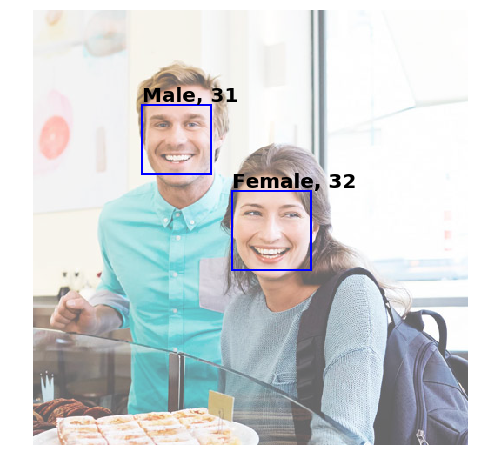

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

In [5]:
"""
path_to_file = "/home/bkic611/Desktop/test/camera.png" #path den file local

with open(path_to_file, 'rb') as f:
    data = f.read()
    
response = requests.request('post', "https://{}.api.cognitive.microsoft.com/face/v1.0/detect".format(region), data=data, headers=headers, params=params)

faces = response.json()
"""

'\npath_to_file = "/home/bkic611/Desktop/test/camera.png" #path den file local\n\nwith open(path_to_file, \'rb\') as f:\n    data = f.read()\n    \nresponse = requests.request(\'post\', "https://{}.api.cognitive.microsoft.com/face/v1.0/detect".format(region), data=data, headers=headers, params=params)\n\nfaces = response.json()\n'

In [6]:
"""
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

image = cv2.imread(path_to_file)

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)

for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")
"""

'\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\nfrom PIL import Image\nfrom matplotlib import patches\nfrom io import BytesIO\n\nimage = cv2.imread(path_to_file)\n\nplt.figure(figsize=(8,8))\nax = plt.imshow(image, alpha=0.6)\n\nfor face in faces:\n    fr = face["faceRectangle"]\n    fa = face["faceAttributes"]\n    origin = (fr["left"], fr["top"])\n    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color=\'b\')\n    ax.axes.add_patch(p)\n    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")\n_ = plt.axis("off")\n'

In [7]:
"""
#Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary['faceRectangle']
    left = rect['left']
    top = rect['top']
    bottom = left + rect['height']
    right = top + rect['width']
    return ((left, top), (bottom, right))

#Download the image from the url
img = Image.open(path_to_file)

#For each face returned use the face rectangle and draw a red box.
draw = ImageDraw.Draw(img)
# cv2.imshow('detected',img)

for face in faces:
    draw.rectangle(getRectangle(face), outline='blue')

#Display the image in the users default image browser.
img.show()
with open('picture_out.png', 'wb') as f:
    f.write(data)
"""

"\n#Convert width height to a point in a rectangle\ndef getRectangle(faceDictionary):\n    rect = faceDictionary['faceRectangle']\n    left = rect['left']\n    top = rect['top']\n    bottom = left + rect['height']\n    right = top + rect['width']\n    return ((left, top), (bottom, right))\n\n#Download the image from the url\nimg = Image.open(path_to_file)\n\n#For each face returned use the face rectangle and draw a red box.\ndraw = ImageDraw.Draw(img)\n# cv2.imshow('detected',img)\n\nfor face in faces:\n    draw.rectangle(getRectangle(face), outline='blue')\n\n#Display the image in the users default image browser.\nimg.show()\nwith open('picture_out.png', 'wb') as f:\n    f.write(data)\n"

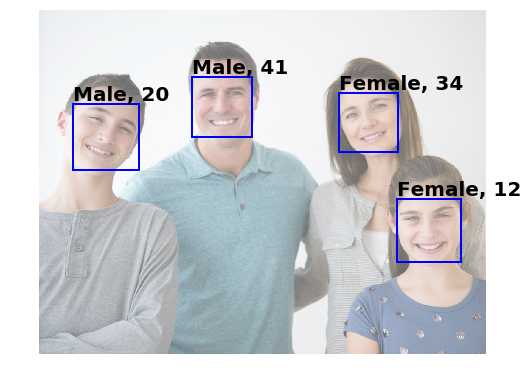

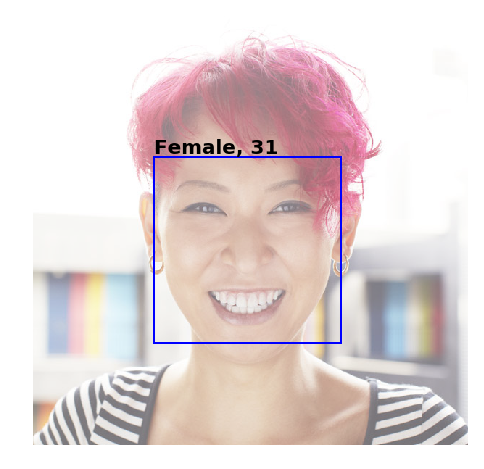

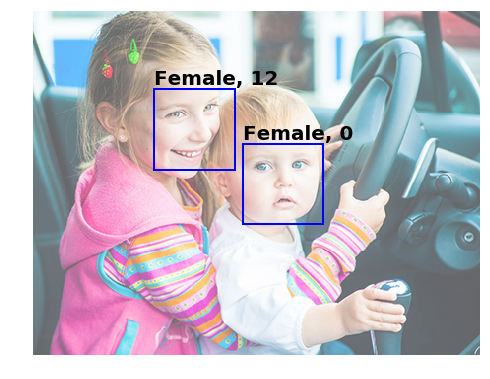

In [8]:
def annotate_image(image_url):
    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    faces = response.json()

    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), \
                 fontsize=20, weight="bold", va="bottom")
    plt.axis("off")
    
annotate_image("https://how-old.net/Images/faces2/main001.jpg")
annotate_image("https://how-old.net/Images/faces2/main002.jpg")
annotate_image("https://how-old.net/Images/faces2/main004.jpg")